In [2]:
import pandas as pd
import numpy as np
import statistics

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from ydata_profiling import ProfileReport

import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [3]:
input_data = pd.read_csv('./spotify-2023.csv', encoding='ISO-8859-1')

In [4]:
input_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5


In [5]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [6]:
input_data.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [7]:
input_data.describe(include='all')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953,953,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953,953.000000,953.000000,953,953.000000,903,953.000000,858,953,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
unique,943,645,NaN,NaN,NaN,NaN,NaN,NaN,949,NaN,NaN,348,NaN,198,NaN,11,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Daylight,Taylor Swift,NaN,NaN,NaN,NaN,NaN,NaN,723894473,NaN,NaN,0,NaN,0,NaN,C#,Major,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,34,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,24,NaN,344,NaN,120,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,NaN,67.812172,51.908709,NaN,2.666317,NaN,122.540399,NaN,NaN,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,NaN,NaN,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,NaN,86.441493,50.630241,NaN,6.035599,NaN,28.057802,NaN,NaN,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,NaN,NaN,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,65.000000,NaN,NaN,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,NaN,NaN,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,NaN,13.000000,7.000000,NaN,0.000000,NaN,100.000000,NaN,NaN,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,NaN,NaN,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,NaN,34.000000,38.000000,NaN,0.000000,NaN,121.000000,NaN,NaN,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,NaN,NaN,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,NaN,88.000000,87.000000,NaN,2.000000,NaN,140.000000,NaN,NaN,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000


In [8]:
input_data['streams'] = pd.to_numeric(input_data['streams'], errors='coerce')
input_data = input_data[~input_data['streams'].isna()]

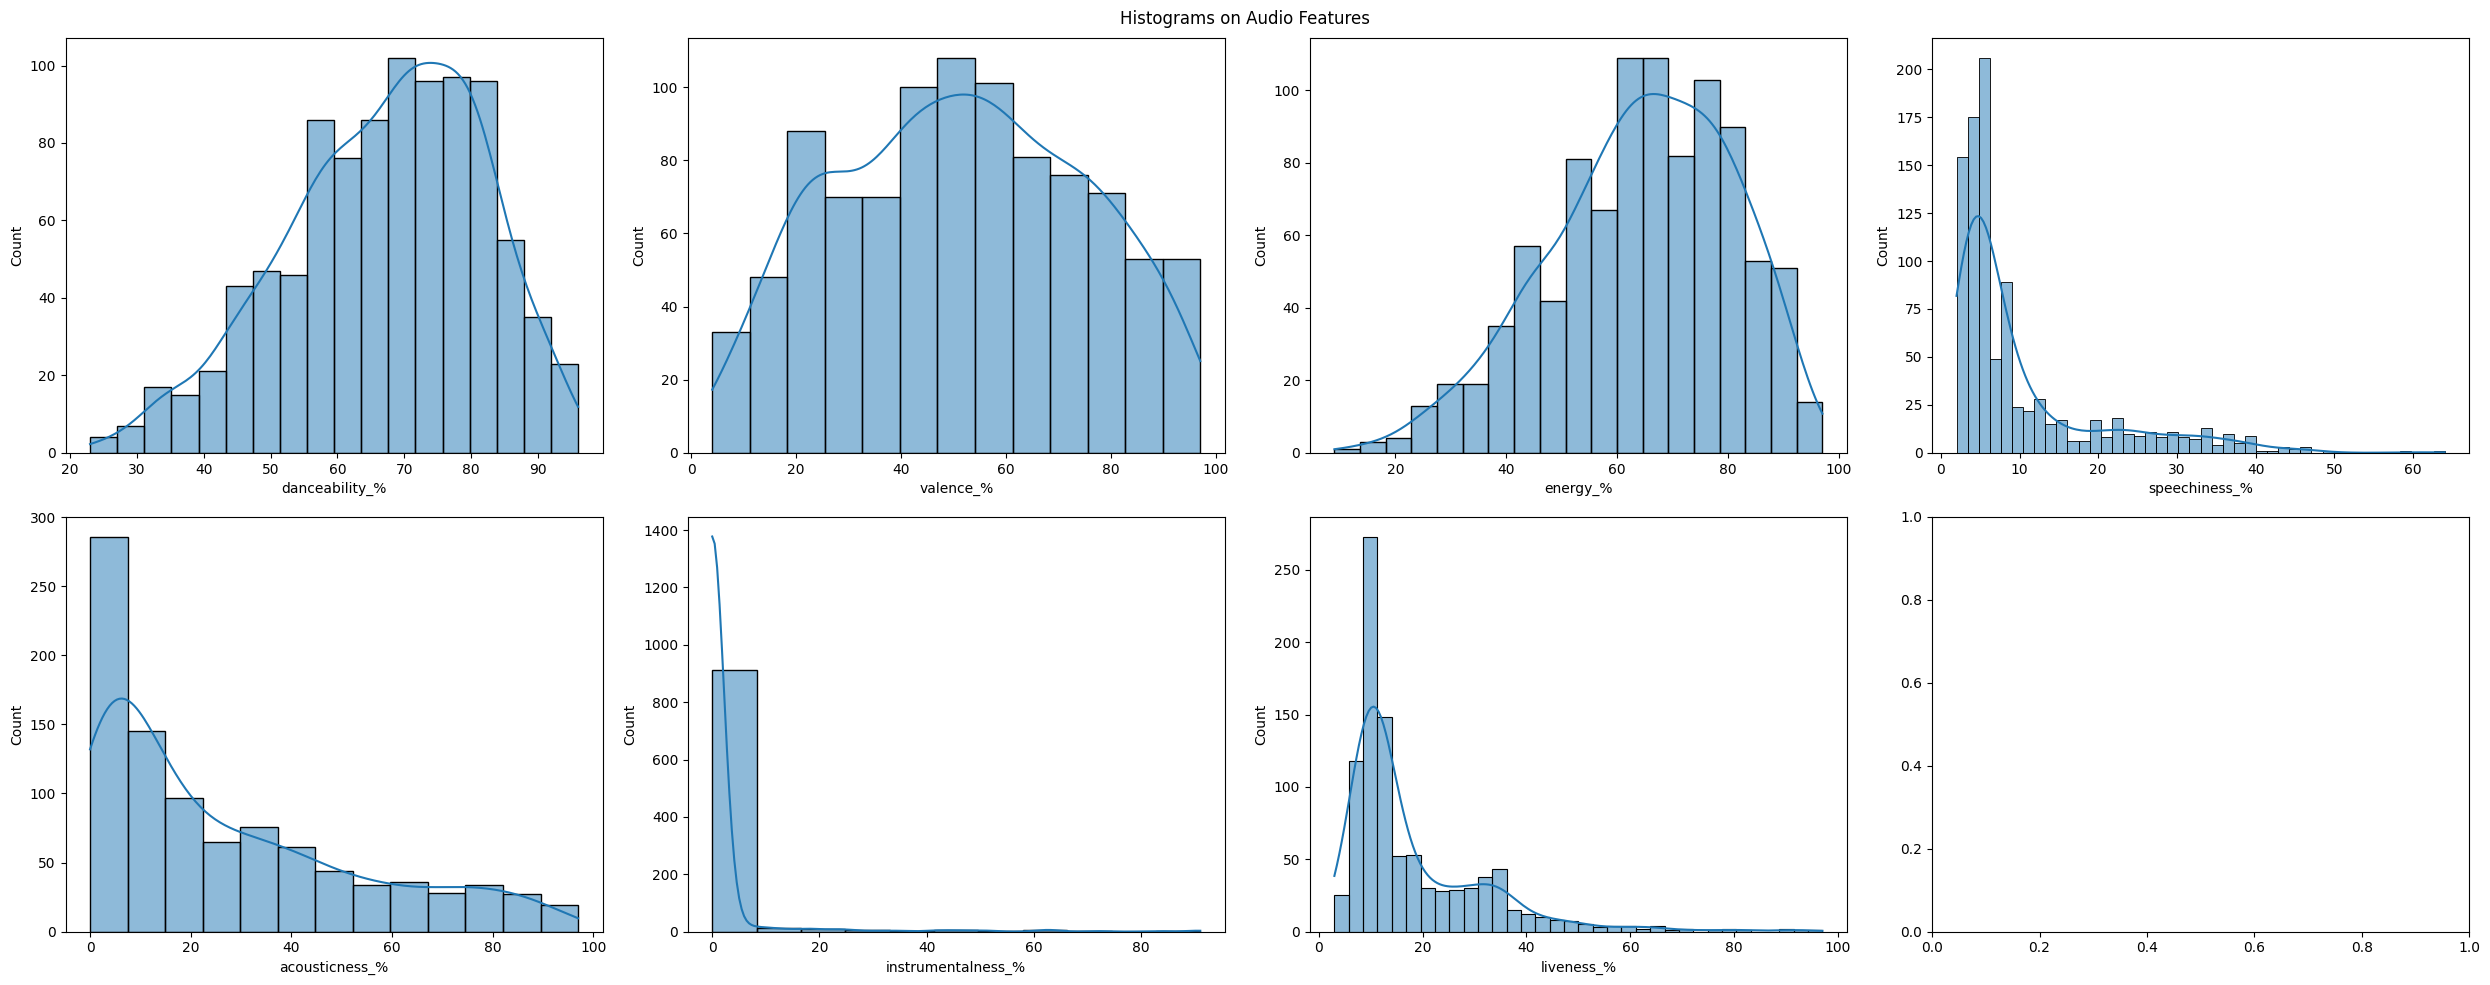

In [9]:
audio_features = input_data[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

sns.histplot(data=audio_features, x="danceability_%", kde=True, ax=axes[0, 0])
sns.histplot(data=audio_features, x="valence_%", kde=True, ax=axes[0, 1])
sns.histplot(data=audio_features, x="energy_%", kde=True, ax=axes[0, 2])
sns.histplot(data=audio_features, x="speechiness_%", kde=True, ax=axes[0, 3])

sns.histplot(data=audio_features, x="acousticness_%", kde=True, ax=axes[1, 0])
sns.histplot(data=audio_features, x="instrumentalness_%", kde=True, ax=axes[1, 1])
sns.histplot(data=audio_features, x="liveness_%", kde=True, ax=axes[1, 2])

fig.suptitle('Histograms on Audio Features')
fig.tight_layout()
fig.savefig('./images/histograms_audio_feautures.png')

In [10]:
for feat in audio_features.columns:
    print(f'Pearson Correlation ({feat}): {pearsonr(audio_features[feat], input_data["streams"])}')

Pearson Correlation (danceability_%): PearsonRResult(statistic=-0.1054568836914191, pvalue=0.0011194979463965127)
Pearson Correlation (valence_%): PearsonRResult(statistic=-0.04083136749515945, pvalue=0.20813833078844157)
Pearson Correlation (energy_%): PearsonRResult(statistic=-0.026051488364248927, pvalue=0.42204075273802527)
Pearson Correlation (acousticness_%): PearsonRResult(statistic=-0.0044846527006840615, pvalue=0.8900897808687565)
Pearson Correlation (instrumentalness_%): PearsonRResult(statistic=-0.0449024731751097, pvalue=0.1662601060739281)
Pearson Correlation (liveness_%): PearsonRResult(statistic=-0.048337295779832486, pvalue=0.13613625046421166)
Pearson Correlation (speechiness_%): PearsonRResult(statistic=-0.11233299640338551, pvalue=0.0005157879912254401)


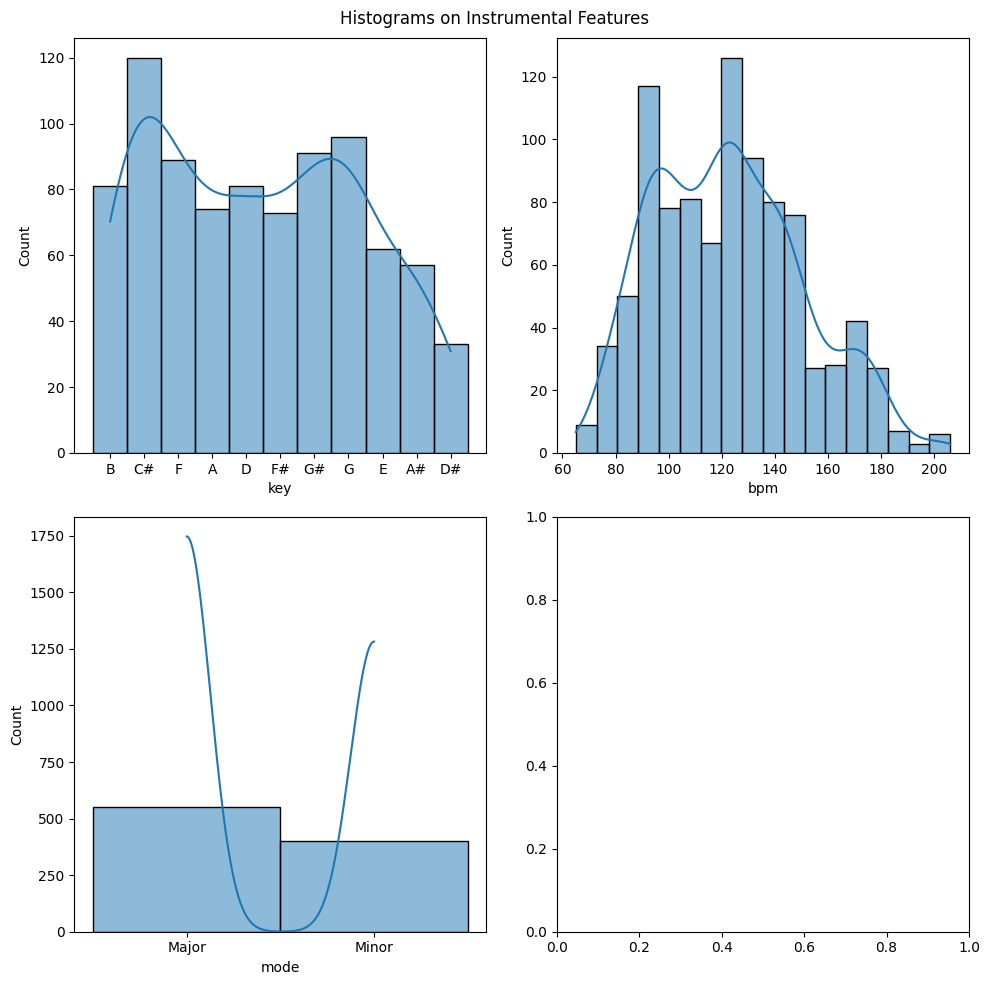

In [11]:
instrument_features = input_data[['bpm', 'key', 'mode']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.histplot(data=instrument_features, x="key", kde=True, ax=axes[0, 0])
sns.histplot(data=instrument_features, x="bpm", kde=True, ax=axes[0, 1])
sns.histplot(data=instrument_features, x="mode", kde=True, ax=axes[1, 0])

fig.suptitle('Histograms on Instrumental Features')
fig.tight_layout()
fig.savefig('./images/histograms_instrumental_feautures.png')

In [12]:
instrument_features = pd.get_dummies(instrument_features, columns=['key', 'mode'])

for feat in instrument_features.columns:
    print(f'Pearson Correlation ({feat}): {pearsonr(instrument_features[feat], input_data["streams"])}')

Pearson Correlation (bpm): PearsonRResult(statistic=-0.002437908138271801, pvalue=0.9401178701572734)
Pearson Correlation (key_A): PearsonRResult(statistic=-0.05395544405625988, pvalue=0.09615381613385589)
Pearson Correlation (key_A#): PearsonRResult(statistic=0.017076946652991056, pvalue=0.59871679378226)
Pearson Correlation (key_B): PearsonRResult(statistic=0.002804595732347985, pvalue=0.9311318565729807)
Pearson Correlation (key_C#): PearsonRResult(statistic=0.060424749547035216, pvalue=0.062373839364323336)
Pearson Correlation (key_D): PearsonRResult(statistic=0.008282742110316344, pvalue=0.7985466492956748)
Pearson Correlation (key_D#): PearsonRResult(statistic=0.013010490745001236, pvalue=0.6884777653327425)
Pearson Correlation (key_E): PearsonRResult(statistic=0.029516790645616183, pvalue=0.36296627853984514)
Pearson Correlation (key_F): PearsonRResult(statistic=-0.025898544125990682, pvalue=0.4247715069398211)
Pearson Correlation (key_F#): PearsonRResult(statistic=0.00418404142

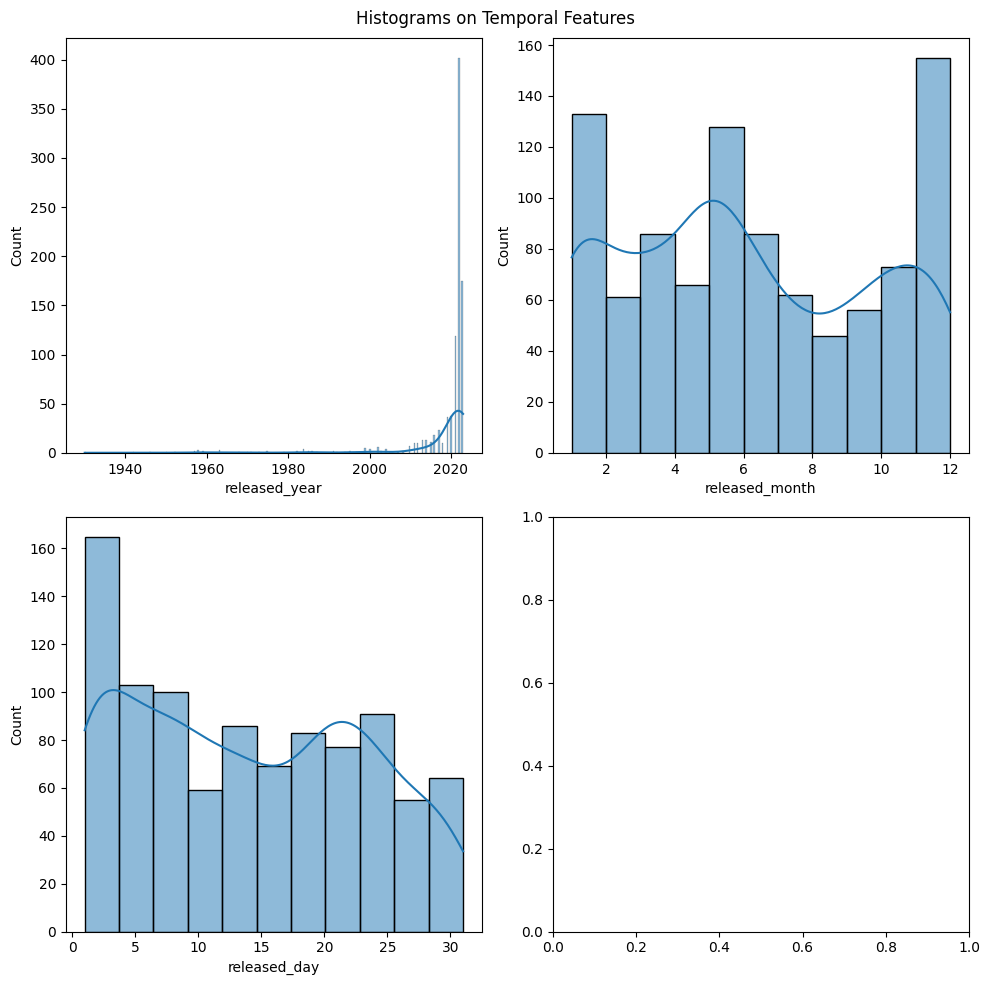

In [13]:
temporal_features = input_data[['released_year', 'released_month', 'released_day']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.histplot(data=temporal_features, x="released_year", kde=True, ax=axes[0, 0])
sns.histplot(data=temporal_features, x="released_month", kde=True, ax=axes[0, 1])
sns.histplot(data=temporal_features, x="released_day", kde=True, ax=axes[1, 0])

fig.suptitle('Histograms on Temporal Features')
fig.tight_layout()
fig.savefig('./images/histograms_temporal_feautures.png')

In [14]:
for feat in temporal_features.columns:
    print(f'Pearson Correlation ({feat}): {pearsonr(temporal_features[feat], input_data["streams"])}')

Pearson Correlation (released_year): PearsonRResult(statistic=-0.23080298001658367, pvalue=5.615320112959894e-13)
Pearson Correlation (released_month): PearsonRResult(statistic=-0.024937928598855266, pvalue=0.44215701869160146)
Pearson Correlation (released_day): PearsonRResult(statistic=0.010597940412743078, pvalue=0.7439903509268516)


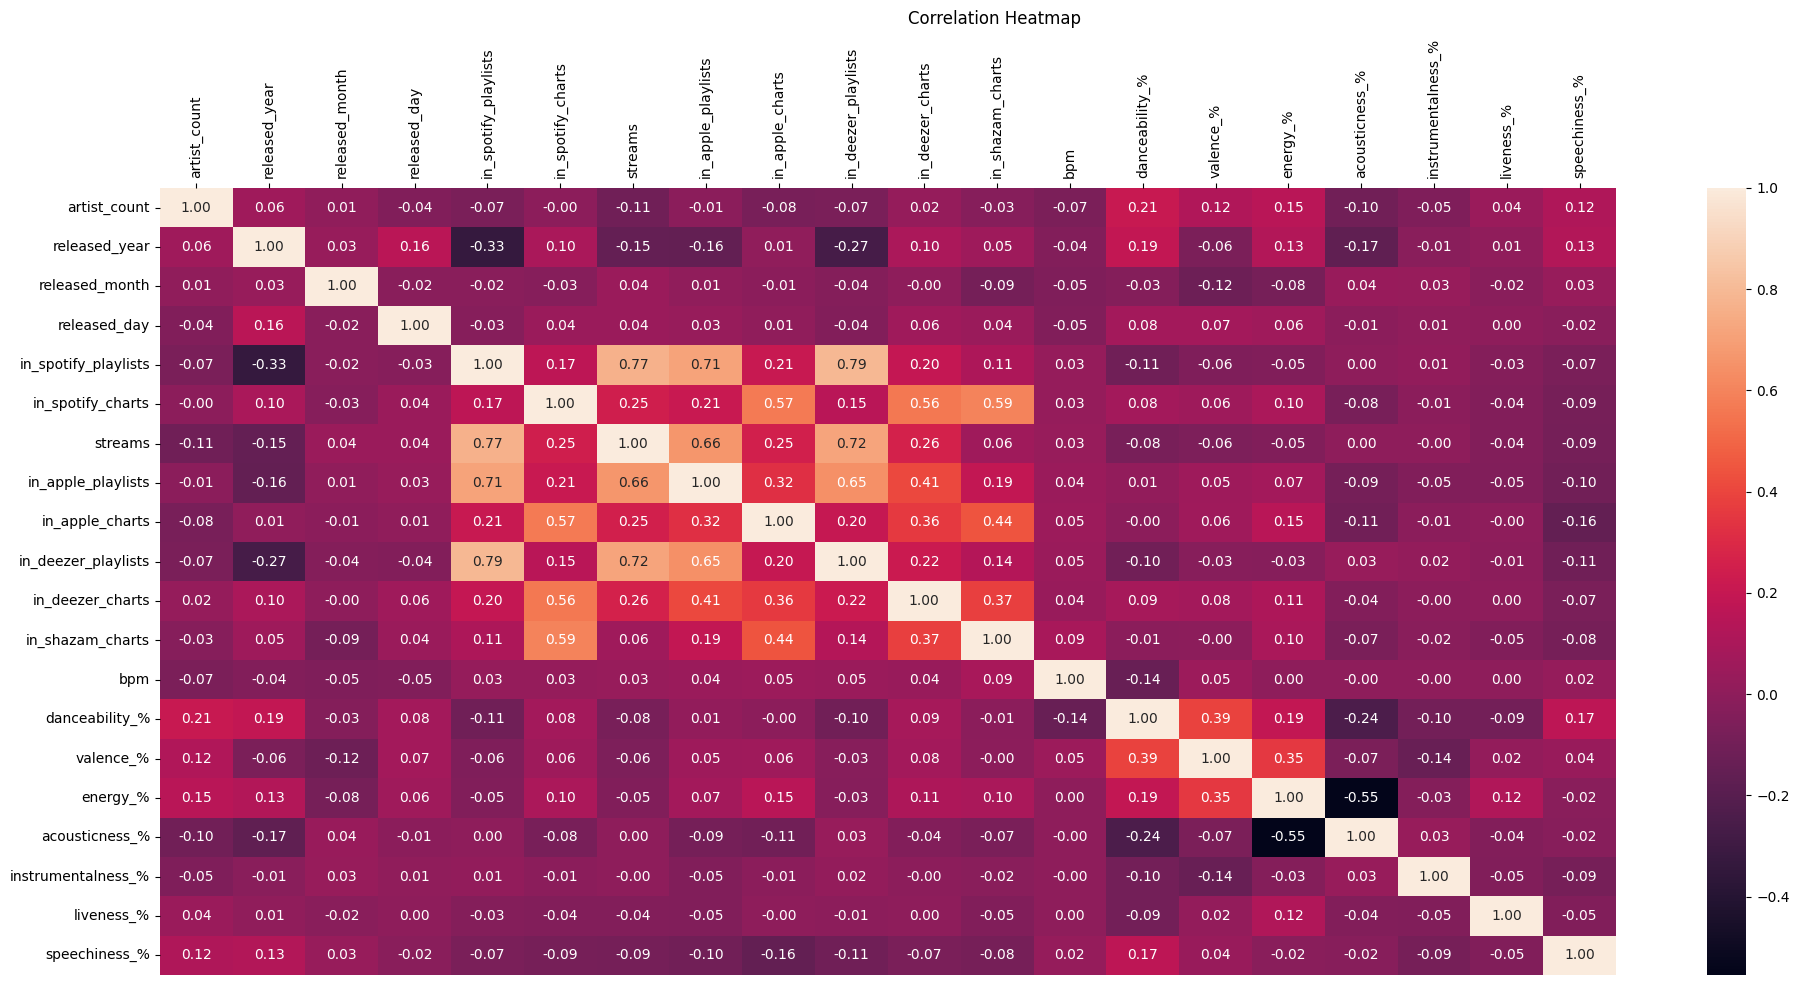

In [15]:
num_features = input_data[['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
                           'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

num_features['streams'] = pd.to_numeric(num_features['streams'], errors='coerce')
num_features['in_deezer_playlists'] = pd.to_numeric(num_features['in_deezer_playlists'], errors='coerce')
num_features['in_shazam_charts'] = pd.to_numeric(num_features['in_shazam_charts'], errors='coerce')

num_features = num_features.dropna()

fig, axes = plt.subplots(figsize=(20, 10))
sns.heatmap(num_features.corr(), annot=True, fmt='.2f').xaxis.tick_top()
axes.tick_params(axis='x', labelrotation=90)

fig.suptitle('Correlation Heatmap')
fig.tight_layout()
fig.savefig('./images/correlation_heatmap_feautures.png')

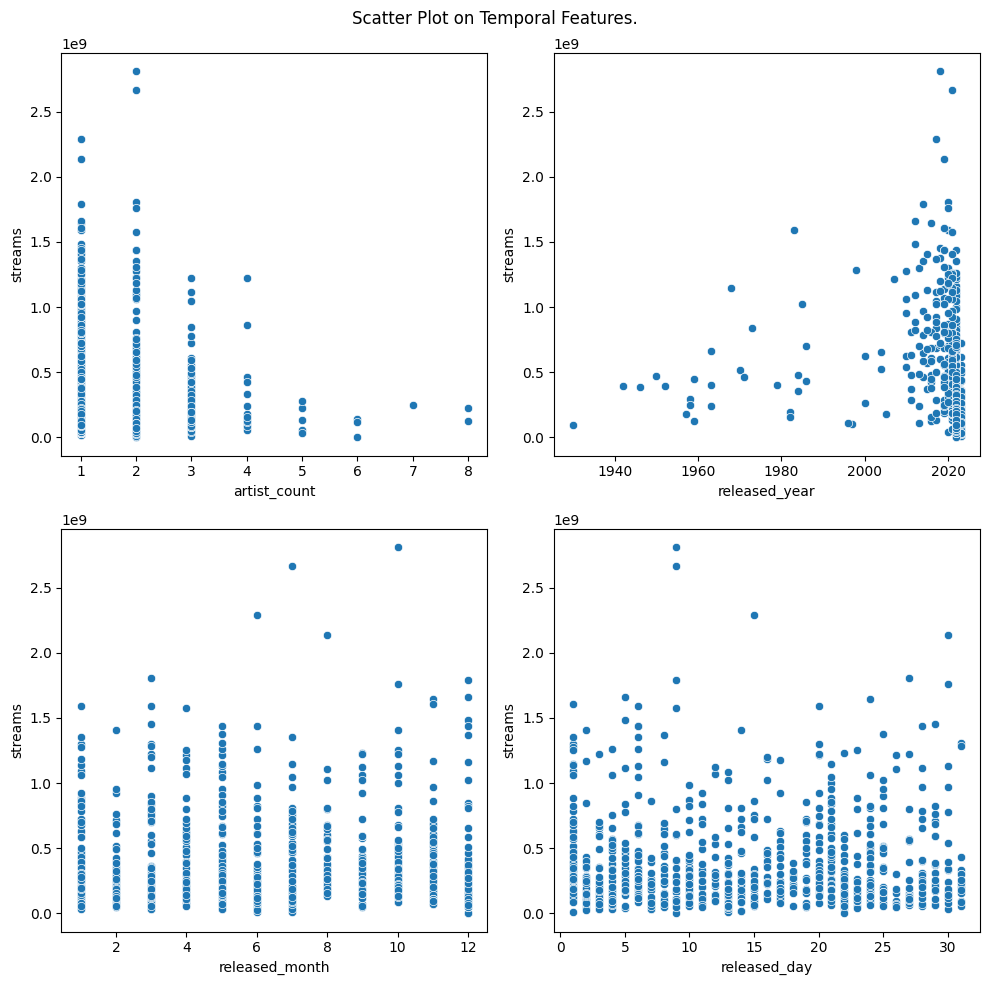

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.scatterplot(num_features, x='artist_count', y='streams', ax=axes[0, 0])
sns.scatterplot(num_features, x='released_year', y='streams', ax=axes[0, 1])
sns.scatterplot(num_features, x='released_month', y='streams', ax=axes[1, 0])
sns.scatterplot(num_features, x='released_day', y='streams', ax=axes[1, 1])

fig.suptitle('Scatter Plot on Temporal Features.')
fig.tight_layout()
fig.savefig('./images/scatter_plot_temporal_feautures.png')

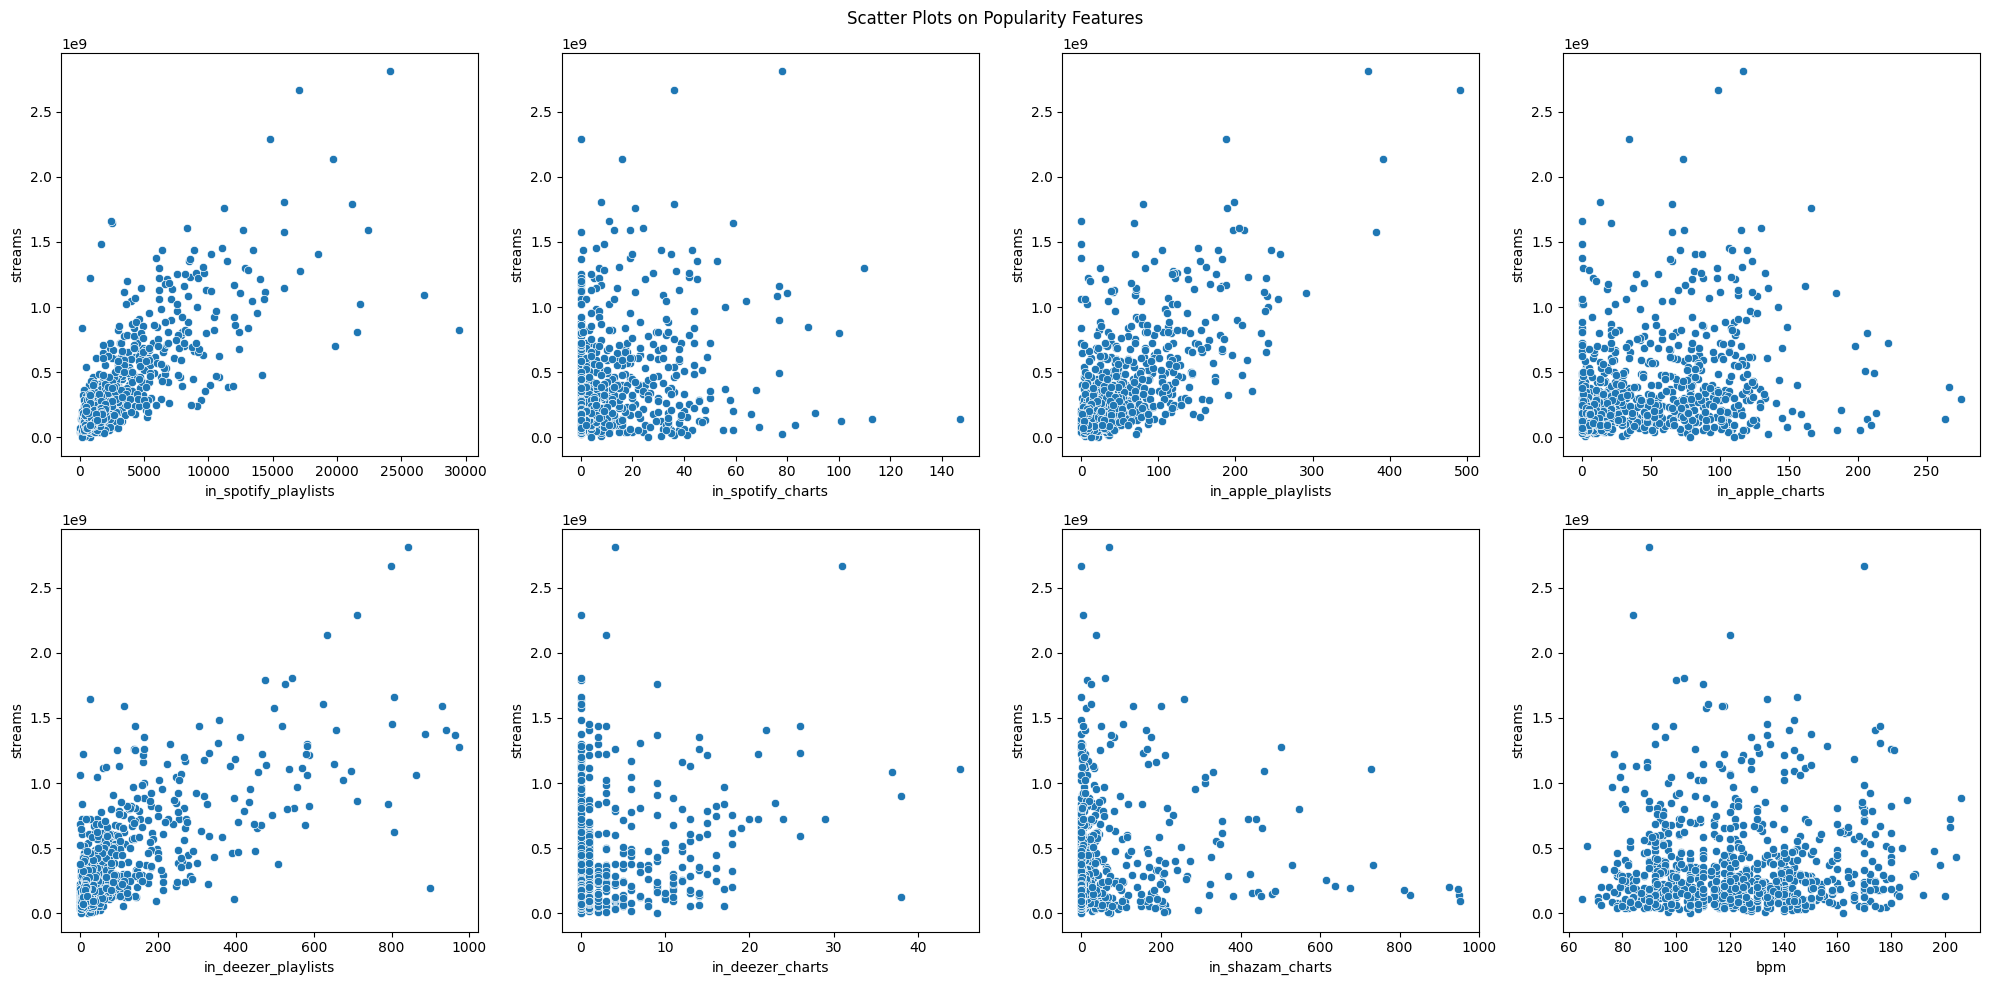

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

sns.scatterplot(num_features, x='in_spotify_playlists', y='streams', ax=axes[0, 0])
sns.scatterplot(num_features, x='in_spotify_charts', y='streams', ax=axes[0, 1])
sns.scatterplot(num_features, x='in_apple_playlists', y='streams', ax=axes[0, 2])
sns.scatterplot(num_features, x='in_apple_charts', y='streams', ax=axes[0, 3])

sns.scatterplot(num_features, x='in_deezer_playlists', y='streams', ax=axes[1, 0])
sns.scatterplot(num_features, x='in_deezer_charts', y='streams', ax=axes[1, 1])
sns.scatterplot(num_features, x='in_shazam_charts', y='streams', ax=axes[1, 2])
sns.scatterplot(num_features, x='bpm', y='streams', ax=axes[1, 3])

fig.suptitle('Scatter Plots on Popularity Features')
fig.tight_layout()
fig.savefig('./images/scatter_plot_popularity_feautures.png')

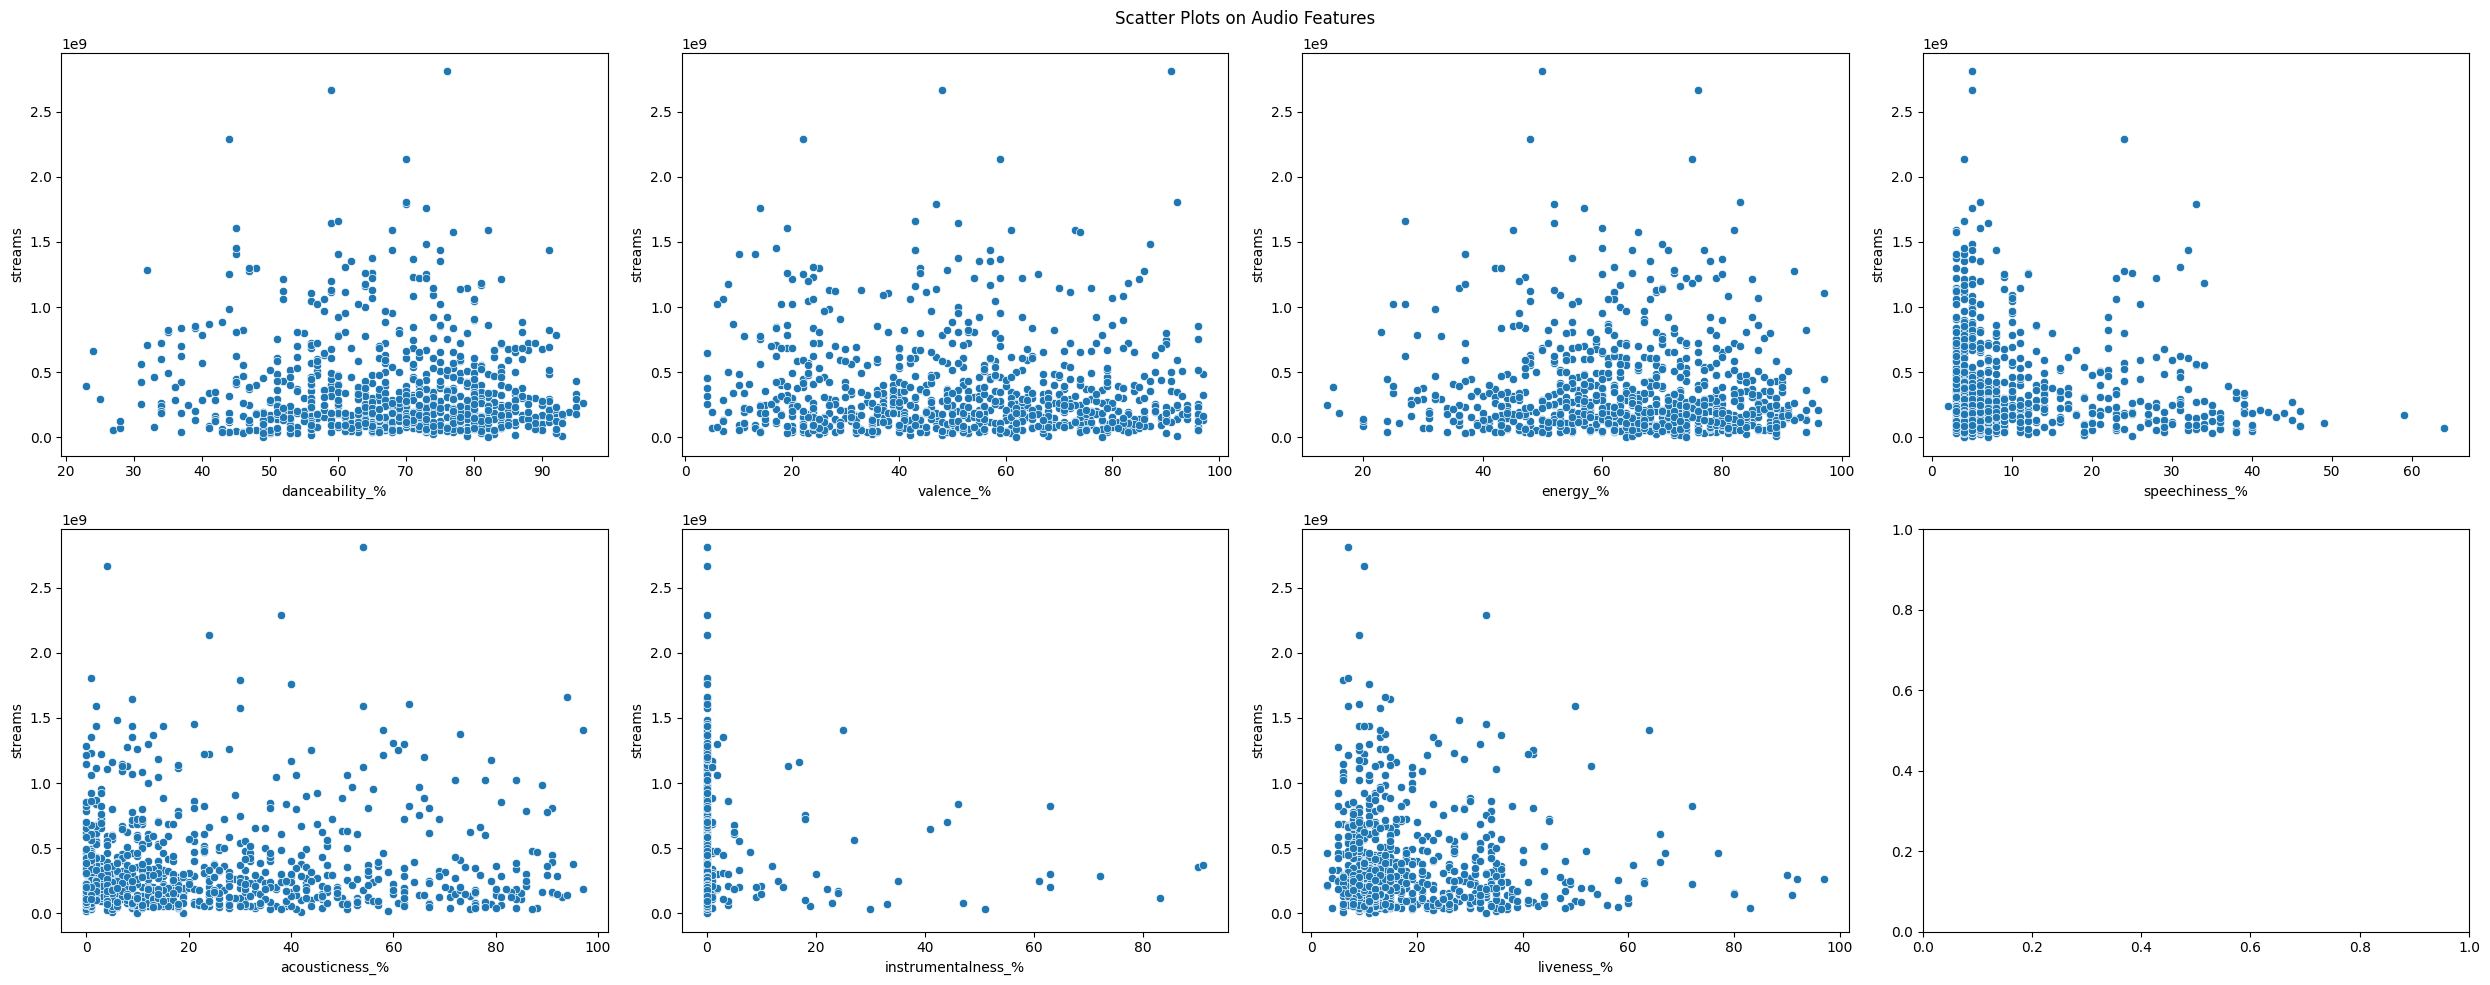

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(25, 10))

sns.scatterplot(data=num_features, x="danceability_%", y='streams', ax=axes[0, 0])
sns.scatterplot(data=num_features, x="valence_%", y='streams', ax=axes[0, 1])
sns.scatterplot(data=num_features, x="energy_%", y='streams', ax=axes[0, 2])
sns.scatterplot(data=num_features, x="speechiness_%", y='streams', ax=axes[0, 3])

sns.scatterplot(data=num_features, x="acousticness_%", y='streams', ax=axes[1, 0])
sns.scatterplot(data=num_features, x="instrumentalness_%", y='streams', ax=axes[1, 1])
sns.scatterplot(data=num_features, x="liveness_%", y='streams', ax=axes[1, 2])

fig.suptitle('Scatter Plots on Audio Features')
fig.tight_layout()
fig.savefig('./images/scatter_plot_audio_feautures.png')

In [3]:
input_data = pd.read_csv('./input_data.csv')

In [5]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   artist_count          952 non-null    int64  
 1   released_year         952 non-null    int64  
 2   released_month        952 non-null    int64  
 3   released_day          952 non-null    int64  
 4   in_spotify_playlists  952 non-null    int64  
 5   in_spotify_charts     952 non-null    int64  
 6   streams               952 non-null    float64
 7   in_apple_playlists    952 non-null    int64  
 8   in_apple_charts       952 non-null    int64  
 9   in_deezer_playlists   952 non-null    int64  
 10  in_deezer_charts      952 non-null    int64  
 11  in_shazam_charts      952 non-null    int64  
 12  bpm                   952 non-null    int64  
 13  danceability_%        952 non-null    int64  
 14  valence_%             952 non-null    int64  
 15  energy_%              9

In [4]:
input_data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,key_NA,mode_Major,mode_Minor
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,385.535714,2.669118,56.907563,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655,0.087185,0.059874,0.089286,0.155462,0.093487,0.035714,0.072479,0.098739,0.082983,0.112395,0.096639,0.015756,0.576681,0.423319
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,1131.078760,6.038152,157.513706,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399,0.282254,0.237378,0.285306,0.362535,0.291267,0.185674,0.259416,0.298469,0.276002,0.316018,0.295620,0.124597,0.494345,0.494345
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,13.000000,0.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,44.000000,0.000000,2.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,164.250000,2.000000,33.250000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,12367.000000,58.000000,1451.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# profile = ProfileReport(input_data, title="Profiling Report")
# profile.to_file("your_report.html")